# Motor Fault Detection using Current Signal Analysis

## Import Required Libraries


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Signal Parameters

In [22]:
fs = 4000                  # Sampling frequency
t = np.linspace(0, 1, fs) # Time axis


## Generate Motor Current Signals


In [23]:
healthy = np.sin(2 * np.pi * 50 * t)

bearing = healthy + 0.4 * np.sin(2 * np.pi * 300 * t)   # Bearing fault
rotor   = healthy * (1 + 0.3 * np.sin(2 * np.pi * 5 * t))  # Rotor fault
stator  = healthy + 0.3 * np.random.randn(len(t))      # Stator fault


## Plot Motor Signals


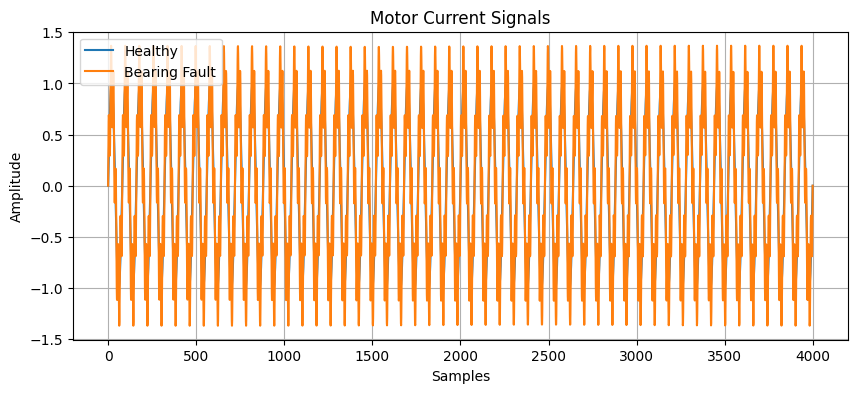

In [24]:
plt.figure(figsize=(10,4))
plt.plot(healthy, label="Healthy")
plt.plot(bearing, label="Bearing Fault")
plt.legend()
plt.title("Motor Current Signals")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


## Feature Extraction Function


In [25]:
def extract_features(signal):
    rms = np.sqrt(np.mean(signal**2))
    mean = np.mean(signal)
    var = np.var(signal)
    peak = np.max(np.abs(signal))
    return rms, mean, var, peak


## Feature Table


In [26]:
features = {
    "Healthy": extract_features(healthy),
    "Bearing": extract_features(bearing),
    "Rotor": extract_features(rotor),
    "Stator": extract_features(stator)
}

df = pd.DataFrame(features, index=["RMS", "Mean", "Variance", "Peak"])
df


,Healthy,Bearing,Rotor,Stator
RMS,7.070184e-01,7.614821e-01,7.227513e-01,0.774235
Mean,2.842171e-17,3.010925e-16,4.884981e-17,-0.001970
Variance,4.998750e-01,5.798550e-01,5.223694e-01,0.599437
Peak,9.999999e-01,1.368107e+00,1.296315e+00,2.011014


## Rule-Based Fault Classification Logic


def classify(signal):
    rms, mean, var, peak = extract_features(signal)

    if var > 0.25 and peak > 1.5:
        return "Bearing Fault"
    elif rms > 1.2 and mean > 0.1:
        return "Rotor Fault"
    elif var > 0.15:
        return "Stator Fault"
    else:
        return "Healthy Motor"


## Real-Time Simulation (Sliding Window)


In [ ]:
window = 25

print("Real-Time Simulation Output:")
for i in range(0, len(healthy), window):
    segment = healthy[i:i+window]
    print(classify(segment))
